<a href="https://colab.research.google.com/github/adithya72/Deep-Learning/blob/Develop/SVHN_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks - Predict numbers out of street images that contains single digit - SVHN dataset

Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.

**Objective :** Build a classifier neural network model that take image as input and determine/predicts the number out of it.

**Dataset** : The data set contains images the contains a single digit and labels for each image are provided

**ML librarie**s : Keras, tensorflow

This notebook covers,

1.   Data importing and understanding
2.   Data preprocessing
3.   Model Training & Evaluation using Neural Network


## Data Importing and Exploration

In [1]:
#import required libraries
import os
import pandas as pd
import numpy as np
import h5py
import tensorflow
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount google drive where thed dataset file resides
from google.colab import drive
drive.mount("/content/Drive")
os.getcwd() #check the current working directory

Mounted at /content/Drive


'/content'

In [3]:
#import the dataset - Autonomous_Vehicles_SVHN_single_grey1.h5 from google drive.
# it's in h5 format, read and see what keys it contain
hf = h5py.File('/content/Drive/MyDrive/NN Dataset/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')
hf.keys()


<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
x_train = np.array(hf.get('X_train'))
y_train =  np.array(hf.get('y_train'))
x_test =  np.array(hf.get('X_test'))
y_test =  np.array(hf.get('y_test'))
hf.close()
print("train dataset shape : ", x_train.shape)
print("train labels dataset shape : ", y_train.shape)
print("test dataset shape : ", x_test.shape)
print("test labels dataset shape : ", y_test.shape)

train dataset shape :  (42000, 32, 32)
train labels dataset shape :  (42000,)
test dataset shape :  (18000, 32, 32)
test labels dataset shape :  (18000,)


Observation - all images are 32*32 matrix, training dataset contains 42000 images and test dataset contains 18000.

## Data Visualisation and preprocessing

[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]
First data point is labled as : 2


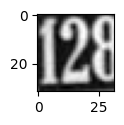

In [5]:
#Let's explore the train dataset
print(x_train[0]) #returns first element which is 32*32 matrix
print("First data point is labled as :",y_train[0]) #returns what the first element is labled as
#let's print the image of first row which 32*32 for this we need matlab library
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
#print the first image
plt.imshow(x_train[0],cmap="gray")
plt.show()

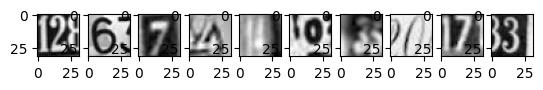

lable for each of the above image :  [2 6 7 4 4 0 3 0 7 3]


In [6]:
#now visualize first 10 figures
for i in range(10):
  plt.subplot(1,10,i+1) #subplot row, col and index number to render
  plt.imshow(x_train[i], cmap="gray")

plt.show()
print("lable for each of the above image : ", y_train[0:10])

Normalize our train and test data i.e. 32*32 gray scale images contains numbers from 0 to 255 - 0 being black and 255 being white. In Neural network -> activation functions: They perform well when the numbers are close to zero hence we are going to reshape them in to vectors and divide all the numbers by 255 to normalize the data.

In [7]:
#flatten the image - it converts 32 * 32 in to one single vector/simple matrix
print(x_train[0])
print(x_test[0])
print("after reshaping")
image_vector_size = 32*32 #1024 inputs
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print(x_train[0])
print(x_test[0])

[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]
[[ 40.558   46.7917  48.9764 ... 112.1153 112.9904 112.1646]
 [ 39.4379  44.2911  47.1768 ... 111.0122 110.9475 109.9368]
 [ 38.4488  43.6394  48.7098 ... 109.8921 109.9414 109.1048]
 ...
 [ 34.9869  35.4707  39.6676 ... 109.211  109.9074 112.7346]
 [ 35.6602  35.5462  40.3193 ... 110.9998 112.049  114.3431]
 [ 36.1871  35.4214  40.6998 ... 110.0169 111.2017 114.1906]]
after reshaping
[33.0704 30.2601 26.852  ... 49.6682 50.853  53.0377]
[ 40.558   46.7917  48.9764 ... 110.0169 111.2017 114.1906]


In [8]:
#normalize the data by dividing it with 255, so all the numbers will be close to zero
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train[0])
print(x_test[0])

print('Training Set Shape', x_train.shape, y_train.shape)
print('Test Set Shape', x_test.shape, y_test.shape)

[0.12968785 0.11866706 0.10530196 ... 0.19477727 0.19942354 0.20799099]
[0.15905097 0.18349686 0.19206432 ... 0.43143883 0.4360851  0.44780627]
Training Set Shape (42000, 1024) (42000,)
Test Set Shape (18000, 1024) (18000,)


Target label's contains numbers from 0-9, but neural network is not going to output the categorial variables like 0,1,2,3,4,5,6,7,8,9 instead it returns a output in the form of vector with a probability. So first all the test label's should be converted in to vectors and model will return either zero's or ones, so for example if it returns 4 zeros then it is 4, if returns 5 zero it would be 5. we use technique called one hot encoding OHT to convert test labels in to vectors.

In [9]:
#Check target variables classes

# Find the unique values and their counts
unique_values, counts = np.unique(y_train, return_counts=True)
print("unique target label value : ", unique_values)
# Count the number of classes
num_classes = len(unique_values)
print("No of target label classes", num_classes)

unique target label value :  [0 1 2 3 4 5 6 7 8 9]
No of target label classes 10


In [10]:
print("Target label value before transformation : ", y_train[0])
print("After Transformation")
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes)
y_test_cat = to_categorical(y_test,num_classes)

print(y_train[0])
print("first 5 training labels as one-hot encoded vectors:\n", y_train[:5])

Target label value before transformation :  2
After Transformation
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
first 5 training labels as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Model Training & Evaluation using Neural Network

In [11]:
# define model
image_size = 32*32 #no of inputs for each image which will be passed to model is 32*32 = 1024
from keras import optimizers
from keras import Sequential
from keras.layers import Dense

#model is sequential
model = Sequential()

#add one layer -
#Dense = every node connected to every node,
#no of nodes = let's start with 10,
#activation is softmax function which returns probability, it can be sigmoid, Relu ..etc.
#input shape = no of inputs
#softmax takes all output and divides by sum of outputs to check the probability of y^ to y.
model.add(Dense(10, activation="softmax", kernel_initializer="he_uniform",input_shape=(image_size,)))


#Model optimizer functions - RMSprop, Adagrad - adam and SGD - Stochastic Gradient Descent
# Gradient Descent - Passes all the inputs to the model and computes the loss/error. Based on the it adjusts the weights.
# Stochastic Gradient Descent - SGD uses only training sample to compute the loss/error and adjust the weights, hence the convergence is
# more, given it runs faster compare to gradient descent which runs entire data set
# Adagrad - Adaptive Gradient - it's similar to SGD but it automatically adjusts the weights based on the loss/error.
# RMSProp - It's similar to adaptive but ensures the learning rate is not too high, it decays the gradient descent
# Adam - RMSProp + SGD with momentum
#An optimization algorithm finds the value of the parameters (weights) that minimize the error when mapping inputs to outputs.
from keras import losses

adam = optimizers.Adam(learning_rate=1e-3) #lr = learning rate 1e-3 = 10 to the power -3 = 1/10 ^ 3 = 0.001
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
#loss function used is catogorical cross entropy since it's classification problem
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                10250     
                                                                 
Total params: 10250 (40.04 KB)
Trainable params: 10250 (40.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
#add callbacks - these are functions called bny optimizers to check the status of the model. Read more ...
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only=True, mode="max", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,min_lr=0.00001, model='auto')
callbacks = [checkpoint, reduce_lr]

In [13]:
# ready to train the model
history = model.fit(x_train, y_train, batch_size=100, epochs=10,verbose=2,callbacks=callbacks,validation_split=0.2)

Epoch 1/10

Epoch 1: saving model to model_weights.h5
336/336 - 4s - loss: 2.3318 - accuracy: 0.1113 - val_loss: 2.3338 - val_accuracy: 0.1123 - lr: 0.0010 - 4s/epoch - 11ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
336/336 - 1s - loss: 2.3087 - accuracy: 0.1281 - val_loss: 2.3133 - val_accuracy: 0.1344 - lr: 0.0010 - 921ms/epoch - 3ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
336/336 - 1s - loss: 2.3004 - accuracy: 0.1435 - val_loss: 2.2844 - val_accuracy: 0.1677 - lr: 0.0010 - 896ms/epoch - 3ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
336/336 - 1s - loss: 2.2887 - accuracy: 0.1581 - val_loss: 2.2947 - val_accuracy: 0.1583 - lr: 0.0010 - 876ms/epoch - 3ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
336/336 - 1s - loss: 2.2902 - accuracy: 0.1614 - val_loss: 2.3066 - val_accuracy: 0.1443 - lr: 0.0010 - 877ms/epoch - 3ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
336/336 - 1s - loss: 2.2602 - accuracy: 0.1

Model accuracy is at 20%

In [14]:
y_pred = model.predict(x_test)

563/563 [==============================] - 1s 2ms/step


Predicted model on the test data. And the out of y_pred would be probabilities of each output class.

In [15]:
y_pred[0]

array([0.0866834 , 0.09834205, 0.11156172, 0.10081939, 0.10867778,
       0.10878824, 0.08275088, 0.09692476, 0.10105115, 0.10440055],
      dtype=float32)

In [16]:
# Compute the max value of these outputs
y_pred_final = []
import numpy as np
for i in y_pred:
  y_pred_final.append(np.argmax(i)) #argmax returns max value of the probability value

In [17]:
#Check first item prediction
print(y_pred_final[0])
print(y_test[0])

2
1


Model wrongly predicted the first element

In [18]:
#Generating classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.22      0.30      0.25      1814
           1       0.16      0.12      0.14      1828
           2       0.19      0.22      0.21      1803
           3       0.19      0.24      0.21      1719
           4       0.22      0.33      0.26      1812
           5       0.17      0.19      0.18      1768
           6       0.19      0.13      0.16      1832
           7       0.16      0.17      0.17      1808
           8       0.19      0.13      0.15      1812
           9       0.23      0.11      0.15      1804

    accuracy                           0.19     18000
   macro avg       0.19      0.19      0.19     18000
weighted avg       0.19      0.19      0.19     18000



Model accuracy is 19% and should work on improving it

In [19]:
# define new model with more dense layers
inputs = 32*32 #no of inputs
from keras import optimizers
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

#model is sequential
model_1 = Sequential()
model_1.add(Dense(60, activation="relu", kernel_initializer="he_uniform",input_shape=(inputs,)))
model_1.add(Dense(40, activation="relu", kernel_initializer="he_uniform"))
model_1.add(Dense(20, activation="relu", kernel_initializer="he_uniform"))
model_1.add(Dense(10, activation="softmax"))



#Model optimizer functions - RMSprop, Adagrad - adam and SGD - Stochastic Gradient Descent - we will choose Adam to start with
#An optimization algorithm finds the value of the parameters (weights) that minimize the error when mapping inputs to outputs.
from keras import losses

# use adam
adam = optimizers.Adam(learning_rate=1e-3) #lr = learning rate 1e-3 = 10 to the power -3 = 1/10 ^ 3 = 0.001
model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
#loss function used is catogorical cross entropy since it's classification problem
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 60)                61500     
                                                                 
 dense_2 (Dense)             (None, 40)                2440      
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 64970 (253.79 KB)
Trainable params: 64970 (253.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#let's try with smaller batch size and more epochs
history = model_1.fit(x_train, y_train, batch_size=50, epochs=20,verbose=2,callbacks=callbacks,validation_split=0.2)

Epoch 1/20

Epoch 1: saving model to model_weights.h5
672/672 - 5s - loss: 2.3021 - accuracy: 0.1020 - val_loss: 2.2878 - val_accuracy: 0.1189 - lr: 0.0010 - 5s/epoch - 7ms/step
Epoch 2/20

Epoch 2: saving model to model_weights.h5
672/672 - 2s - loss: 2.1877 - accuracy: 0.1775 - val_loss: 2.0746 - val_accuracy: 0.2242 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 3/20

Epoch 3: saving model to model_weights.h5
672/672 - 3s - loss: 1.8712 - accuracy: 0.3314 - val_loss: 1.7070 - val_accuracy: 0.4063 - lr: 0.0010 - 3s/epoch - 5ms/step
Epoch 4/20

Epoch 4: saving model to model_weights.h5
672/672 - 3s - loss: 1.5637 - accuracy: 0.4681 - val_loss: 1.5522 - val_accuracy: 0.4818 - lr: 0.0010 - 3s/epoch - 4ms/step
Epoch 5/20

Epoch 5: saving model to model_weights.h5
672/672 - 2s - loss: 1.4457 - accuracy: 0.5148 - val_loss: 1.4075 - val_accuracy: 0.5300 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 6/20

Epoch 6: saving model to model_weights.h5
672/672 - 2s - loss: 1.3756 - accuracy: 0.5399 - val_los

The newly build improved performance to 67% which is way above the initial 20%

In [21]:
#let's further reduce the batch size and see if improved the accuracy
history = model_1.fit(x_train, y_train, batch_size=30, epochs=20,verbose=2,callbacks=callbacks,validation_split=0.2)



Epoch 1/20

Epoch 1: saving model to model_weights.h5
1120/1120 - 6s - loss: 1.0721 - accuracy: 0.6687 - val_loss: 1.0856 - val_accuracy: 0.6624 - lr: 0.0010 - 6s/epoch - 5ms/step
Epoch 2/20

Epoch 2: saving model to model_weights.h5
1120/1120 - 4s - loss: 1.0450 - accuracy: 0.6745 - val_loss: 1.0697 - val_accuracy: 0.6669 - lr: 0.0010 - 4s/epoch - 3ms/step
Epoch 3/20

Epoch 3: saving model to model_weights.h5
1120/1120 - 6s - loss: 1.0351 - accuracy: 0.6800 - val_loss: 1.0529 - val_accuracy: 0.6737 - lr: 0.0010 - 6s/epoch - 5ms/step
Epoch 4/20

Epoch 4: saving model to model_weights.h5
1120/1120 - 4s - loss: 1.0260 - accuracy: 0.6848 - val_loss: 1.0323 - val_accuracy: 0.6846 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 5/20

Epoch 5: saving model to model_weights.h5
1120/1120 - 4s - loss: 1.0128 - accuracy: 0.6859 - val_loss: 1.0532 - val_accuracy: 0.6742 - lr: 0.0010 - 4s/epoch - 3ms/step
Epoch 6/20

Epoch 6: saving model to model_weights.h5
1120/1120 - 5s - loss: 1.0147 - accuracy: 0.68

The new fitting of model returns 72% accuracy and it reached to flattened line, no further improvement noticed.

Let's check training, validation loss vs no of epochs

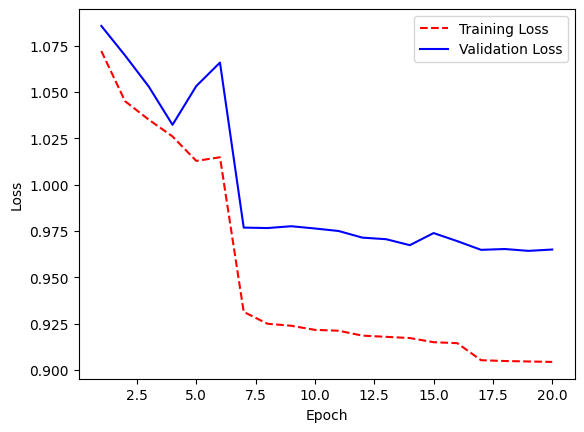

In [22]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

Let's check training accuracy, validation accuracy vs number of epochs

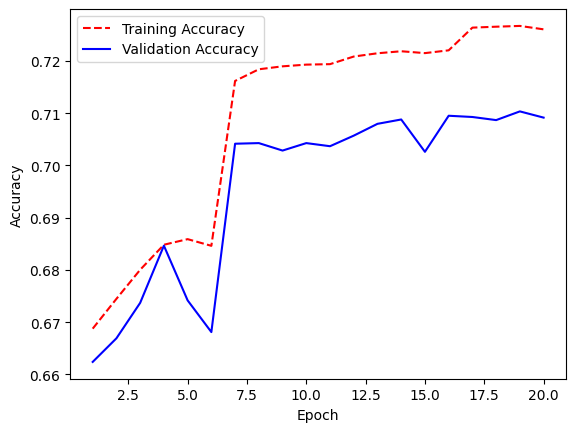

In [23]:
# Get training and test accuracy histories
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In summary, accuracy of model is increased with more dense layers, and no of epochs. The accuracy stayed flat once it reached 18 epochs and no further improvement noticed. And it's the vice versa for training loss and validation loss, it significanlty reduced with increase of  

The overall accuracy of the model is significantly improved from single dense layer.

Let's further look in to classification matrix and report, by re running prediction on test data.

In [27]:
y_pred = model_1.predict(x_test)

563/563 [==============================] - 3s 5ms/step


In [28]:
# Compute the max value of these outputs
y_pred_final = []
import numpy as np
for i in y_pred:
  y_pred_final.append(np.argmax(i)) #argmax returns max value of the probability value

In [29]:
#Generating classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1814
           1       0.68      0.76      0.72      1828
           2       0.77      0.74      0.76      1803
           3       0.68      0.66      0.67      1719
           4       0.75      0.79      0.77      1812
           5       0.70      0.67      0.68      1768
           6       0.73      0.69      0.71      1832
           7       0.73      0.74      0.74      1808
           8       0.67      0.62      0.65      1812
           9       0.71      0.69      0.70      1804

    accuracy                           0.71     18000
   macro avg       0.71      0.71      0.71     18000
weighted avg       0.71      0.71      0.71     18000



Classification Report shows model performaed with 71% accuracy on test dataset

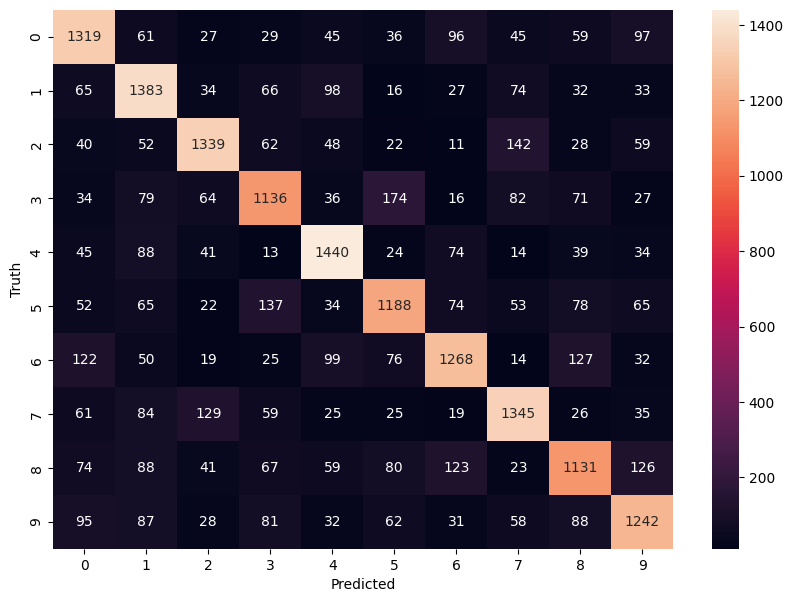

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Model seems to have misclassified

- 2 images to 7 and vice versa -> these shapes might be close enough
- 3 images to 5 and vice versa -> that's intersting they generally don't look similar
- 6 images to either 0 or 8 -> they are close enough







In [32]:
index=0
misclassified_images=[]
for label, predict in zip(y_test,y_pred_final):
  if label != predict:
    misclassified_images.append(index)
  index += 1
print("Overall model misclassified : ", len(misclassified_images), " out of" , len(y_test), "that's about", (len(misclassified_images)/len(y_test))*100 , "%" )


Overall model misclassified :  5209  out of 18000 that's about 28.938888888888886 %
